<a href="https://colab.research.google.com/github/dralvima/IITmethods/blob/main/3_Body.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THIS IS TO COMPUTE TIMESERIES FOR BOTH A 2 BODY AND A 3 BODY SOLAR SYSTEM:**

https://towardsdatascience.com/modelling-the-three-body-problem-in-classical-mechanics-using-python-9dc270ad7767

In [ ]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [ ]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

In [ ]:
#Define masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Convert pos vectors to arrays
r1=numpy.array(r1,dtype="float64")
r2=numpy.array(r2,dtype="float64")#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=numpy.array(v1,dtype="float64")
v2=numpy.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

In [ ]:
#A function defining the equations of motion
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]

    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector

    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2

    r_derivs=numpy.concatenate((dr1bydt,dr2bydt))
    derivs=numpy.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [ ]:
#Package initial parameters
init_params=numpy.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=numpy.linspace(0,8,500) #8 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate

two_body_sol=scipy.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

In [ ]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

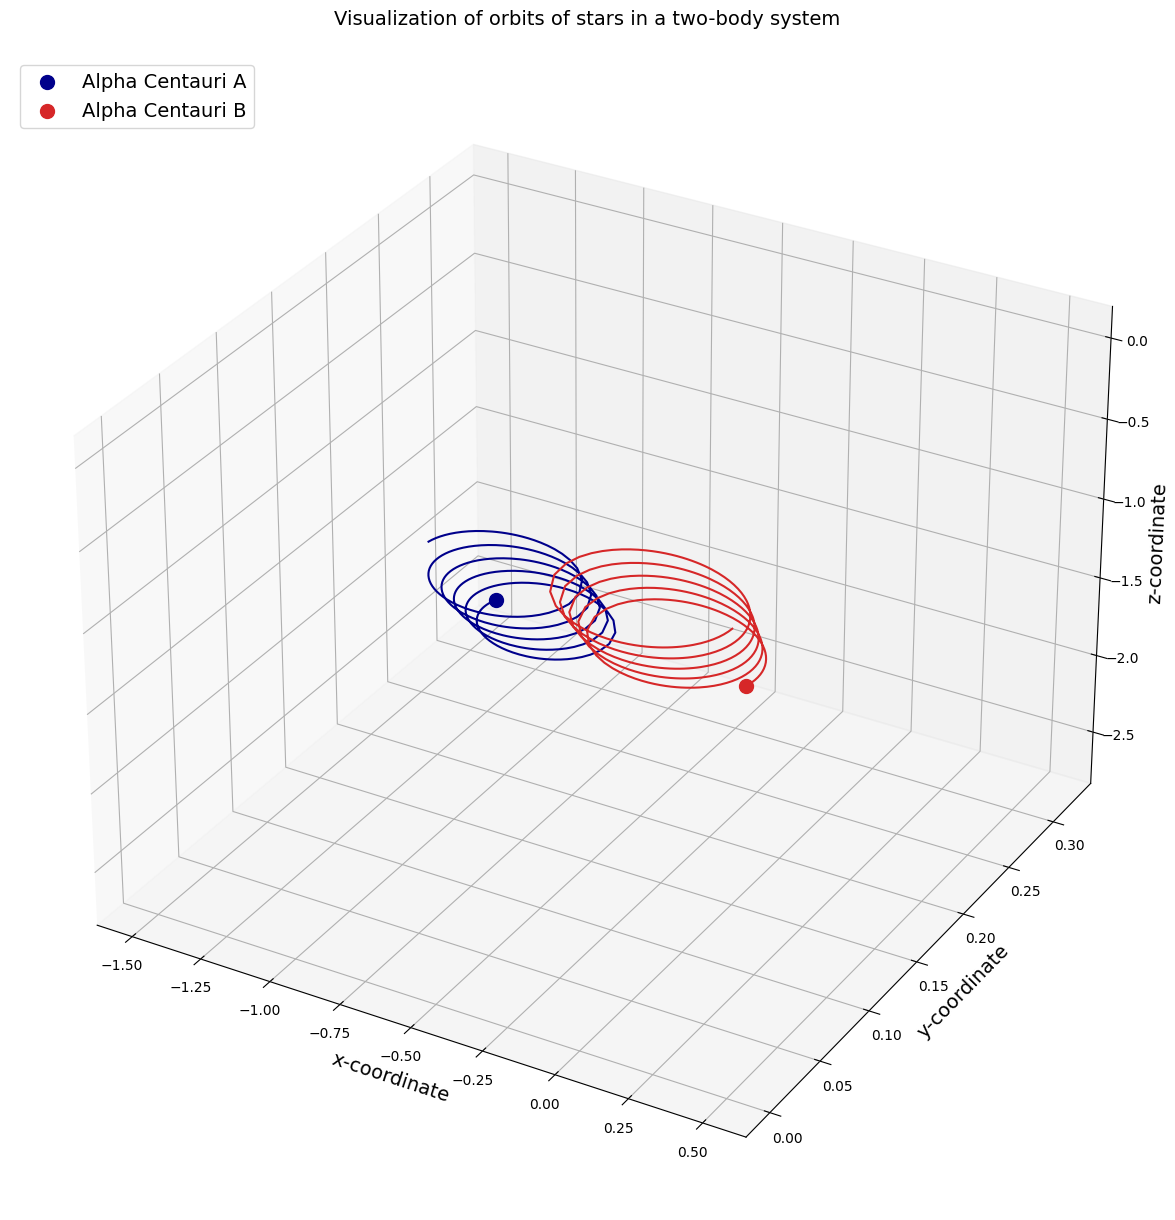

In [ ]:
#Create figure
fig=plt.figure(figsize=(15,15))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [ ]:
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)

#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol

#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol

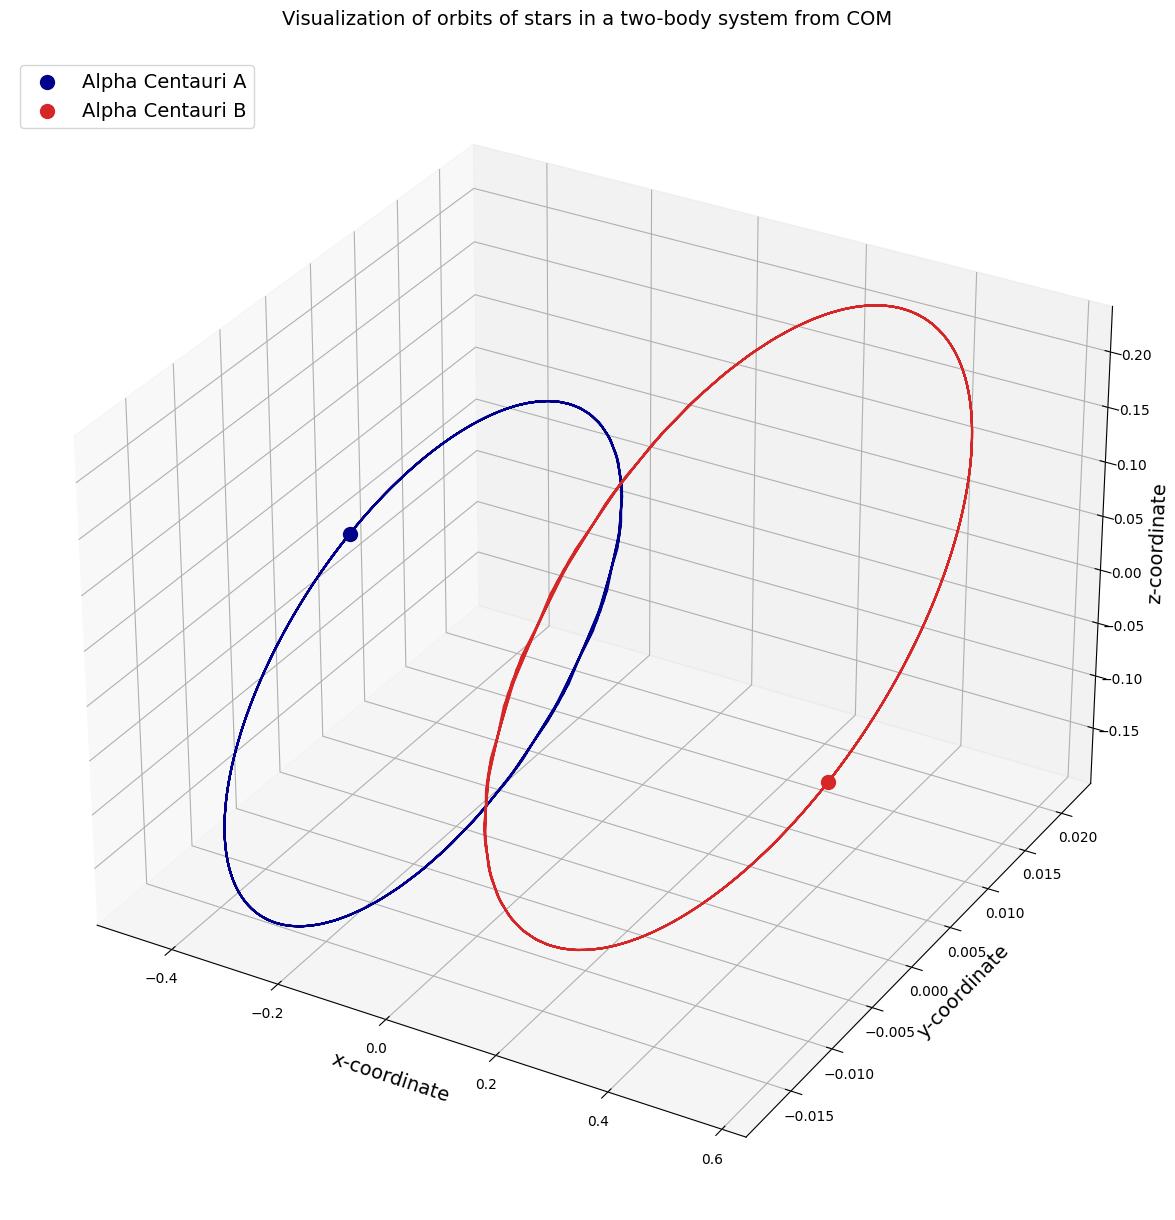

In [ ]:
#Create figure
fig=plt.figure(figsize=(15,15))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1com_sol[:,0],r1com_sol[:,1],r1com_sol[:,2],color="darkblue")
ax.plot(r2com_sol[:,0],r2com_sol[:,1],r2com_sol[:,2],color="tab:red")

#Plot the final positions of the stars
ax.scatter(r1com_sol[-1,0],r1com_sol[-1,1],r1com_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2com_sol[-1,0],r2com_sol[-1,1],r2com_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system from COM\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [ ]:
#Mass of the Third Star
m3=1.0 #Third Star

#Position of the Third Star
r3=[0,1,0] #m
r3=numpy.array(r3,dtype="float64")

#Velocity of the Third Star
v3=[0,-0.01,0]
v3=numpy.array(v3,dtype="float64")

In [ ]:
#Update COM formula
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)

#Update velocity of COM formula
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

In [ ]:
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]

    r12=sci.linalg.norm(r2-r1)
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)

    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3

    r12_derivs=numpy.concatenate((dr1bydt,dr2bydt))
    r_derivs=numpy.concatenate((r12_derivs,dr3bydt))
    v12_derivs=numpy.concatenate((dv1bydt,dv2bydt))
    v_derivs=numpy.concatenate((v12_derivs,dv3bydt))
    derivs=numpy.concatenate((r_derivs,v_derivs))
    return derivs

In [ ]:
#Package initial parameters
init_params=numpy.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=numpy.linspace(0,20,500) #20 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate

three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

In [ ]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

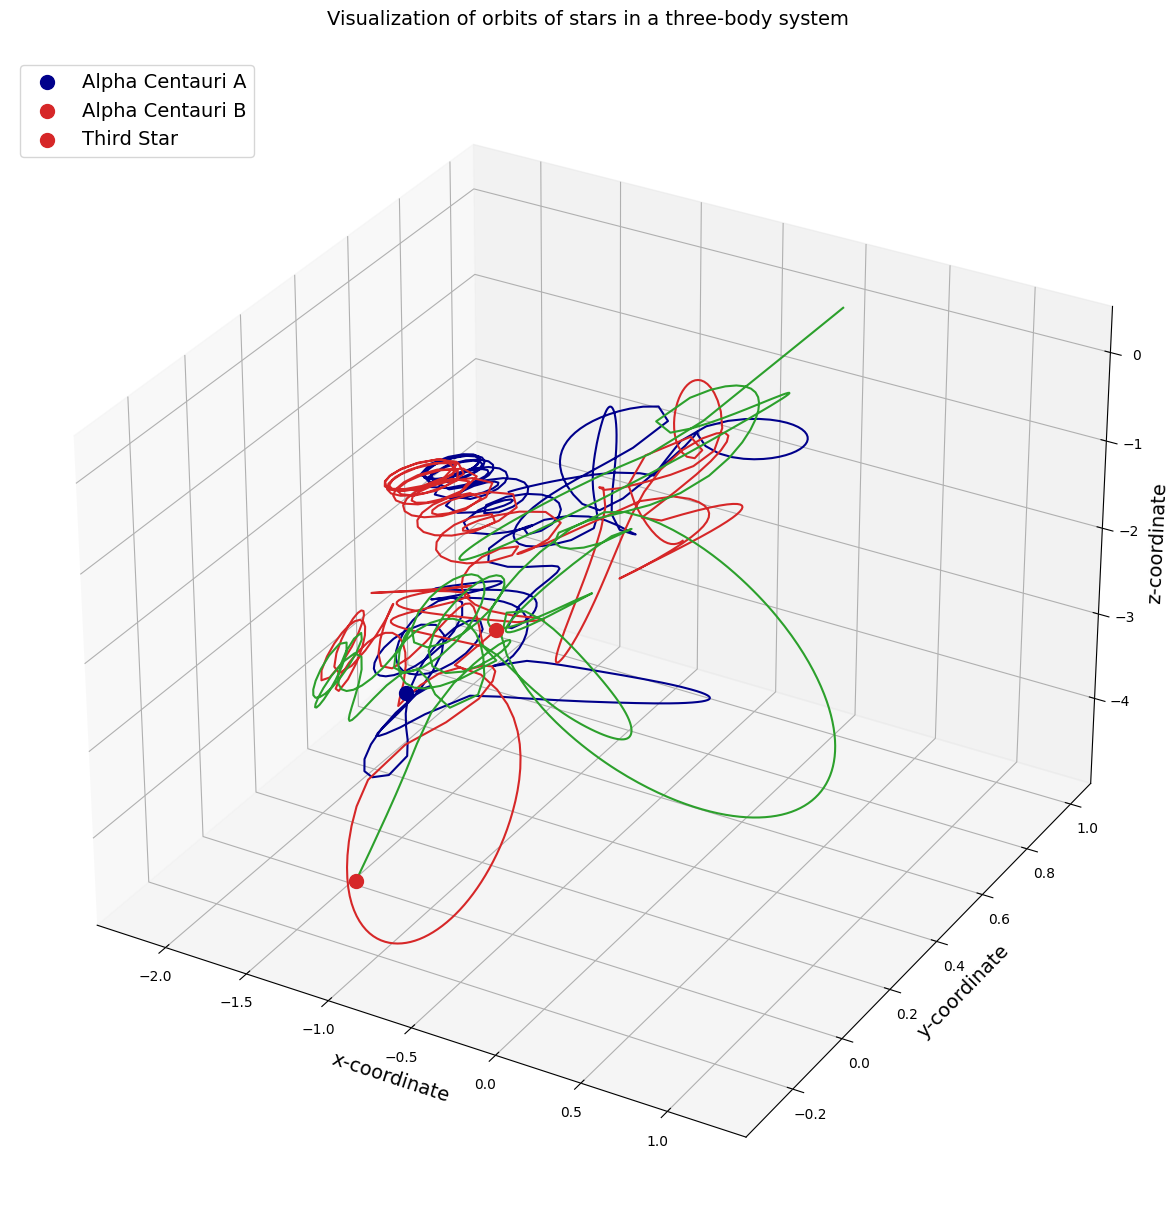

In [ ]:
#Create figure
fig=plt.figure(figsize=(15,15))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="tab:green")

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="tab:red",marker="o",s=100,label="Third Star")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a three-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)



---


# **ChatGPT4 turning this into an animation:**

---





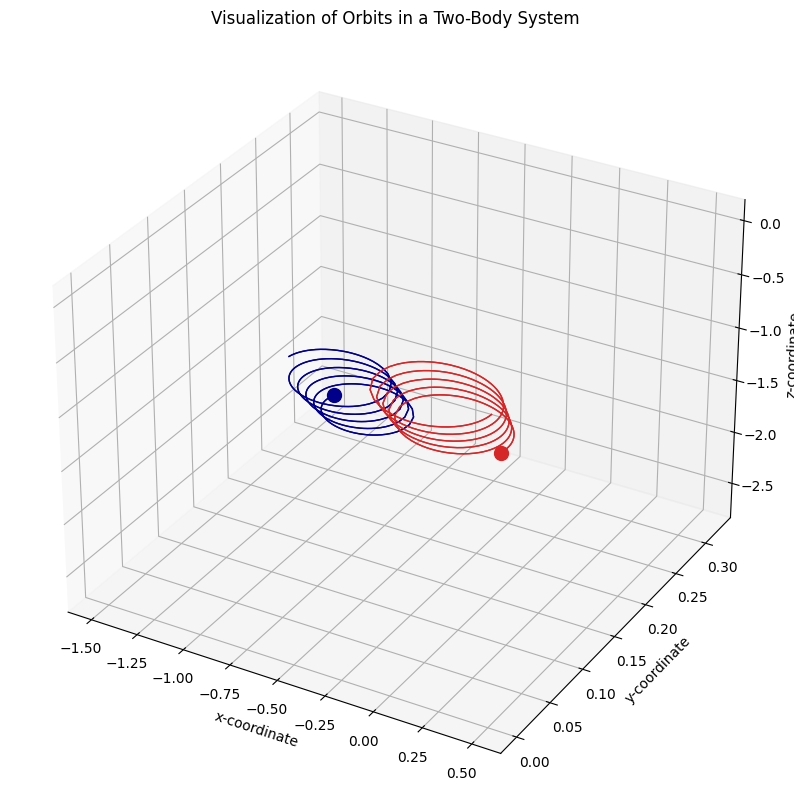

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import scipy.integrate

# Constants and Parameters
G = 6.67408e-11  # Gravitational constant
m_nd = 1.989e+30  # Mass of the sun (kg)
r_nd = 5.326e+12  # Distance between stars in Alpha Centauri (m)
v_nd = 30000  # Relative velocity of earth around the sun (m/s)
t_nd = 79.91 * 365 * 24 * 3600 * 0.51  # Orbital period of Alpha Centauri (s)

K1 = G * t_nd * m_nd / (r_nd**2 * v_nd)
K2 = v_nd * t_nd / r_nd

# Masses
m1 = 1.1  # Alpha Centauri A
m2 = 0.907  # Alpha Centauri B

# Initial position vectors
r1 = [-0.5, 0, 0]  # m
r2 = [0.5, 0, 0]  # m

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import scipy.integrate

# Constants and Parameters
G = 6.67408e-11  # Gravitational constant
m_nd = 1.989e+30  # Mass of the sun (kg)
r_nd = 5.326e+12  # Distance between stars in Alpha Centauri (m)
v_nd = 30000  # Relative velocity of earth around the sun (m/s)
t_nd = 79.91 * 365 * 24 * 3600 * 0.51  # Orbital period of Alpha Centauri (s)

K1 = G * t_nd * m_nd / (r_nd**2 * v_nd)
K2 = v_nd * t_nd / r_nd

# Masses
m1 = 1.1  # Alpha Centauri A
m2 = 0.907  # Alpha Centauri B

# Initial position vectors
r1 = [-0.5, 0, 0]  # m
r2 = [0.5, 0, 0]  # m

r1 = np.array(r1, dtype="float64")
r2 = np.array(r2, dtype="float64")

# Initial velocities
v1 = [0.01, 0.01, 0]  # m/s
v2 = [-0.05, 0, -0.1]  # m/s

v1 = np.array(v1, dtype="float64")
v2 = np.array(v2, dtype="float64")

# Equations of Motion
def TwoBodyEquations(w, t, G, m1, m2):
    r1 = w[:3]
    r2 = w[3:6]
    v1 = w[6:9]
    v2 = w[9:12]

    r = np.linalg.norm(r2-r1)

    dv1bydt = K1 * m2 * (r2 - r1) / r**3
    dv2bydt = K1 * m1 * (r1 - r2) / r**3
    dr1bydt = K2 * v1
    dr2bydt = K2 * v2

    r_derivs = np.concatenate((dr1bydt, dr2bydt))
    derivs = np.concatenate((r_derivs, dv1bydt, dv2bydt))
    return derivs

# Initial parameters
init_params = np.array([r1, r2, v1, v2]).flatten()
time_span = np.linspace(0, 8, 500)  # 8 orbital periods, 500 points

# Solve the equations
two_body_sol = scipy.integrate.odeint(TwoBodyEquations, init_params, time_span, args=(G, m1, m2))
r1_sol = two_body_sol[:, :3]
r2_sol = two_body_sol[:, 3:6]

# Animation setup
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

def init():
    ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color="darkblue", lw=1)
    ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color="tab:red", lw=1)
    return fig,

def animate(i):
    ax.clear()
    ax.plot(r1_sol[:i, 0], r1_sol[:i, 1], r1_sol[:i, 2], color="darkblue", lw=1)
    ax.plot(r2_sol[:i, 0], r2_sol[:i, 1], r2_sol[:i, 2], color="tab:red", lw=1)
    ax.scatter(r1_sol[i, 0], r1_sol[i, 1], r1_sol[i, 2], color="darkblue", marker="o", s=100)
    ax.scatter(r2_sol[i, 0], r2_sol[i, 1], r2_sol[i, 2], color="tab:red", marker="o", s=100)
    ax.set_xlabel("x-coordinate")
    ax.set_ylabel("y-coordinate")
    ax.set_zlabel("z-coordinate")
    ax.set_title("Visualization of Orbits in a Two-Body System")
    return fig,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(time_span), init_func=init, interval=50)

# Save the animation as a video file
ani.save('orbit_animation.mp4', writer='ffmpeg', fps=20)

# Display the video in Colab
from IPython.display import Video
Video('orbit_animation.mp4')

# CHAT GPT4 SOLUTION FOR A GRAPH ON VELOCITY:

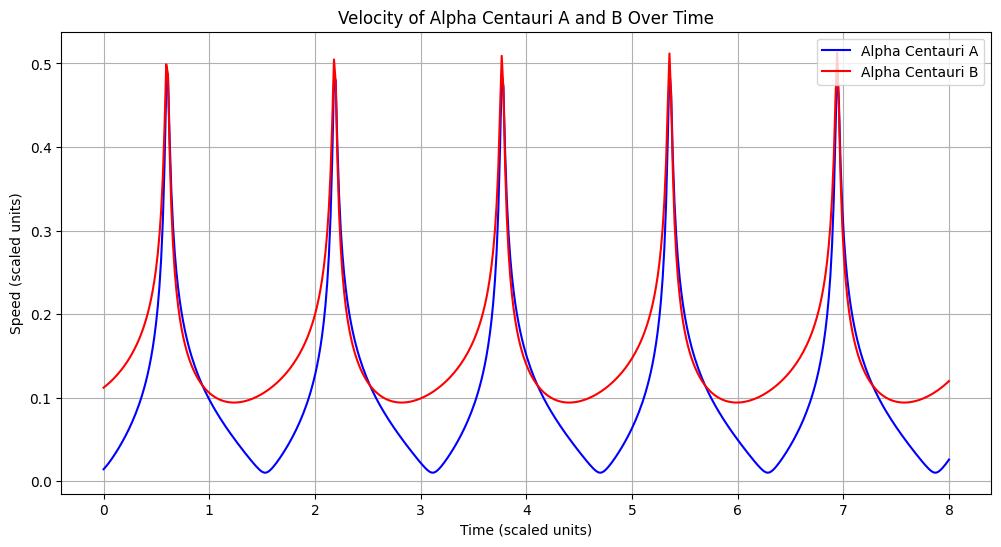

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.linalg import norm

# Constants
G = 6.67408e-11  # Gravitational constant, N-m2/kg2
m_nd = 1.989e+30  # Mass of the sun, kg
r_nd = 5.326e+12  # Distance between stars in Alpha Centauri, m
v_nd = 30000  # Relative velocity of earth around the sun, m/s
t_nd = 79.91 * 365 * 24 * 3600 * 0.51  # Orbital period of Alpha Centauri, s

# Net constants
K1 = G * t_nd * m_nd / (r_nd**2 * v_nd)
K2 = v_nd * t_nd / r_nd

# Masses
m1 = 1.1  # Alpha Centauri A
m2 = 0.907  # Alpha Centauri B

# Initial position vectors
r1 = np.array([-0.5, 0, 0], dtype="float64")
r2 = np.array([0.5, 0, 0], dtype="float64")

# Initial velocities
v1 = np.array([0.01, 0.01, 0], dtype="float64")
v2 = np.array([-0.05, 0, -0.1], dtype="float64")

# Equations of Motion
def TwoBodyEquations(w, t, G, m1, m2):
    r1 = w[:3]
    r2 = w[3:6]
    v1 = w[6:9]
    v2 = w[9:12]

    r = norm(r2 - r1)

    dv1bydt = K1 * m2 * (r2 - r1) / r**3
    dv2bydt = K1 * m1 * (r1 - r2) / r**3
    dr1bydt = K2 * v1
    dr2bydt = K2 * v2

    derivs = np.concatenate((dr1bydt, dr2bydt, dv1bydt, dv2bydt))
    return derivs

# Initial parameters
init_params = np.array([r1, r2, v1, v2]).flatten()

# Time span
time_span = np.linspace(0, 8, 500)  # 8 orbital periods, 500 points

# Solve ODE
two_body_sol = odeint(TwoBodyEquations, init_params, time_span, args=(G, m1, m2))

# Extract velocities
v1_sol = two_body_sol[:, 6:9]
v2_sol = two_body_sol[:, 9:12]

# Calculate speeds
speed1 = np.linalg.norm(v1_sol, axis=1)
speed2 = np.linalg.norm(v2_sol, axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_span, speed1, label="Alpha Centauri A", color='blue')
plt.plot(time_span, speed2, label="Alpha Centauri B", color='red')
plt.xlabel("Time (scaled units)")
plt.ylabel("Speed (scaled units)")
plt.title("Velocity of Alpha Centauri A and B Over Time")
plt.legend()
plt.grid(True)
plt.show()


# AND ACCELERATION:

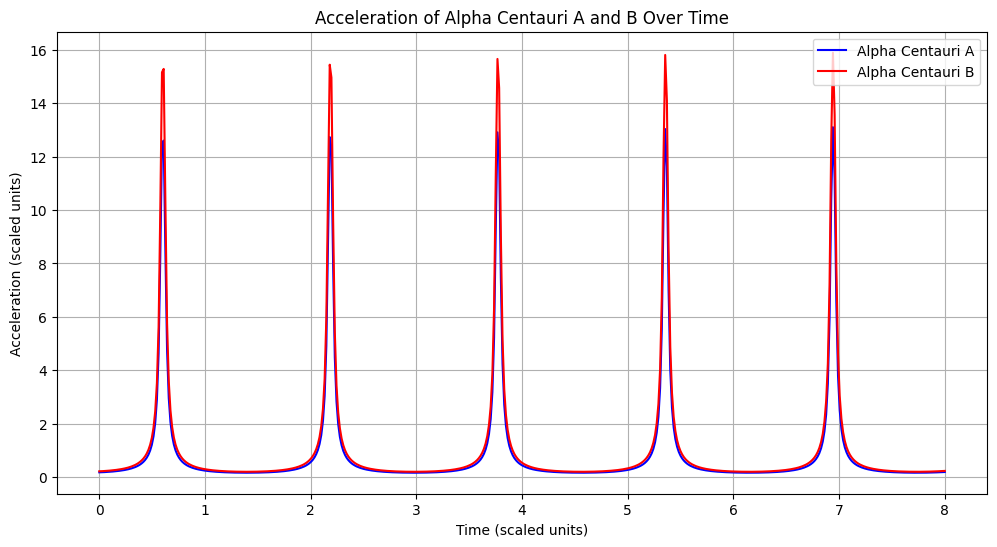

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ... [previous code for constants, masses, initial conditions, and TwoBodyEquations function] ...

# Time span for solving the ODE
time_span = np.linspace(0, 8, 500)  # 8 orbital periods, 500 points

# Solve ODE
two_body_sol = odeint(TwoBodyEquations, init_params, time_span, args=(G, m1, m2))

# Extract velocities
v1_sol = two_body_sol[:, 6:9]
v2_sol = two_body_sol[:, 9:12]

# Calculate acceleration by taking the derivative of velocity
acceleration1 = np.gradient(v1_sol, time_span, axis=0)
acceleration2 = np.gradient(v2_sol, time_span, axis=0)

# Calculate magnitudes of accelerations
acceleration1_magnitude = np.linalg.norm(acceleration1, axis=1)
acceleration2_magnitude = np.linalg.norm(acceleration2, axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_span, acceleration1_magnitude, label="Alpha Centauri A", color='blue')
plt.plot(time_span, acceleration2_magnitude, label="Alpha Centauri B", color='red')
plt.xlabel("Time (scaled units)")
plt.ylabel("Acceleration (scaled units)")
plt.title("Acceleration of Alpha Centauri A and B Over Time")
plt.legend()
plt.grid(True)
plt.show()


# VELOCITY WITH MEDIAN:

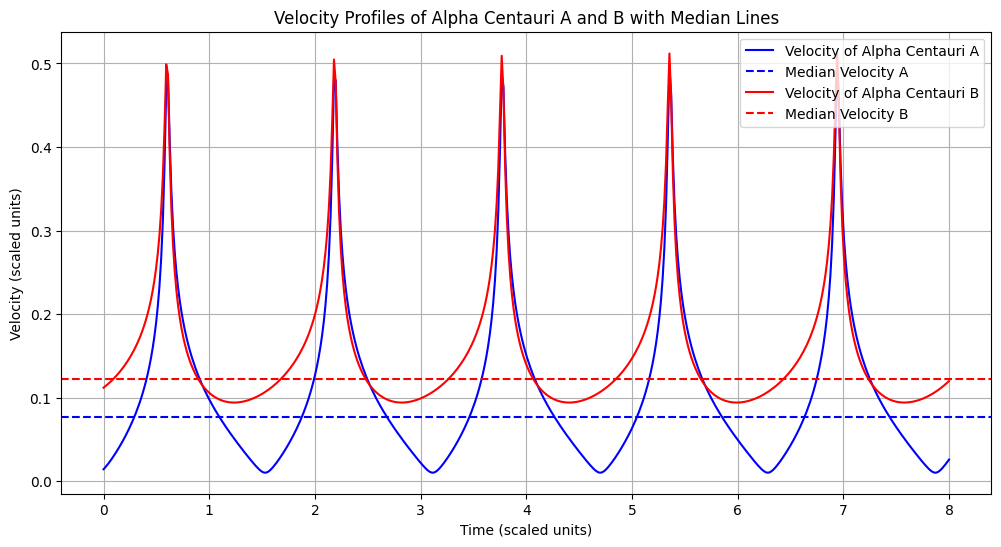

In [ ]:
# Calculating median velocities for Alpha Centauri A and B
median_velocity_A = np.median(np.linalg.norm(v1_sol, axis=1))
median_velocity_B = np.median(np.linalg.norm(v2_sol, axis=1))

# Plotting velocity profiles with median lines
plt.figure(figsize=(12, 6))

# Plotting velocity of Alpha Centauri A
plt.plot(time_span, np.linalg.norm(v1_sol, axis=1), label="Velocity of Alpha Centauri A", color='blue')
plt.axhline(y=median_velocity_A, color='blue', linestyle='--', label="Median Velocity A")

# Plotting velocity of Alpha Centauri B
plt.plot(time_span, np.linalg.norm(v2_sol, axis=1), label="Velocity of Alpha Centauri B", color='red')
plt.axhline(y=median_velocity_B, color='red', linestyle='--', label="Median Velocity B")

plt.title("Velocity Profiles of Alpha Centauri A and B with Median Lines")
plt.xlabel("Time (scaled units)")
plt.ylabel("Velocity (scaled units)")
plt.legend()
plt.grid(True)
plt.show()


# STAIRCASE PLOT FOLLOWING BINARIZATION:

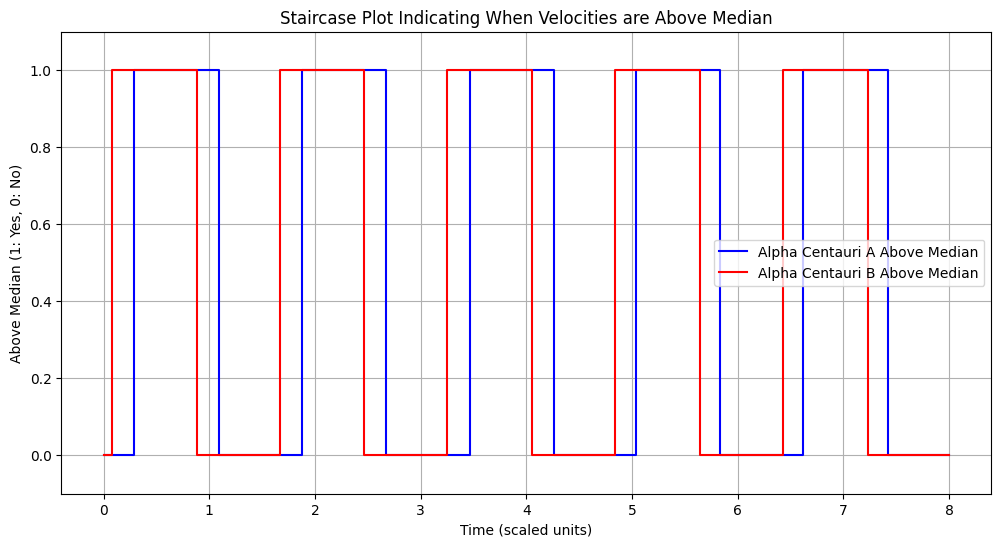

In [ ]:
# Creating a staircase plot to show when velocities are above or below the median
above_median_A = np.where(np.linalg.norm(v1_sol, axis=1) > median_velocity_A, 1, 0)
above_median_B = np.where(np.linalg.norm(v2_sol, axis=1) > median_velocity_B, 1, 0)

# Plotting
plt.figure(figsize=(12, 6))

# Staircase plot for Alpha Centauri A
plt.step(time_span, above_median_A, label="Alpha Centauri A Above Median", color='blue')

# Staircase plot for Alpha Centauri B
plt.step(time_span, above_median_B, label="Alpha Centauri B Above Median", color='red')

plt.title("Staircase Plot Indicating When Velocities are Above Median")
plt.xlabel("Time (scaled units)")
plt.ylabel("Above Median (1: Yes, 0: No)")
plt.ylim(-0.1, 1.1)  # Set y limits to clearly show 0 and 1
plt.legend()
plt.grid(True)
plt.show()


# STATE HISTOGRAM:

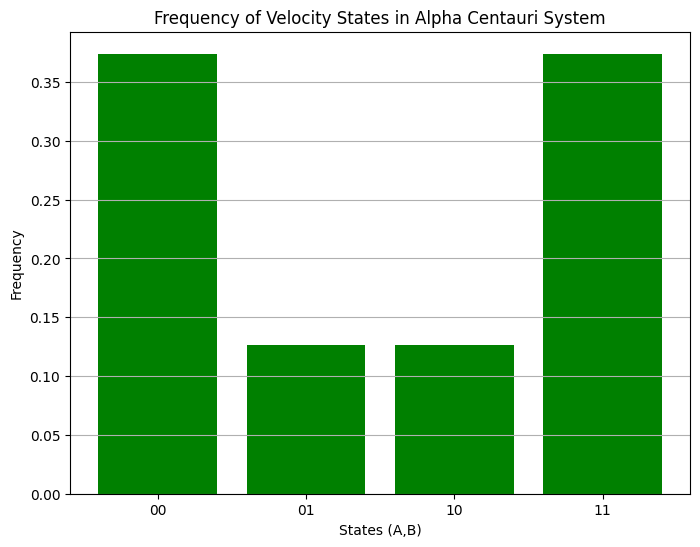

In [ ]:
# Combining the states of A and B to determine the four different states
combined_states = above_median_A * 2 + above_median_B

# Counting the occurrences of each state
state_counts = np.bincount(combined_states, minlength=4)

# Calculating the frequency of each state
state_frequencies = state_counts / len(combined_states)

# State labels
state_labels = ['00', '01', '10', '11']

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.bar(state_labels, state_frequencies, color='green')
plt.title("Frequency of Velocity States in Alpha Centauri System")
plt.xlabel("States (A,B)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


# TPM:

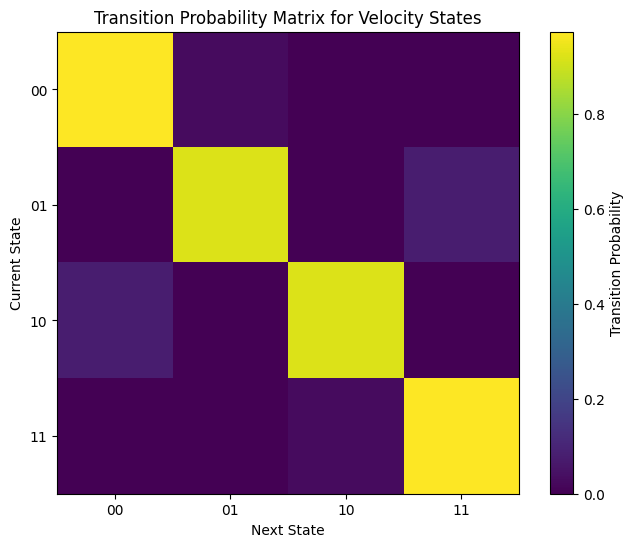

In [ ]:
# Function to calculate transition probabilities between states
def calculate_transition_probabilities(states):
    # Number of unique states
    num_states = 4

    # Initialize transition matrix
    transition_matrix = np.zeros((num_states, num_states))

    # Count transitions
    for (current, next_) in zip(states[:-1], states[1:]):
        transition_matrix[current, next_] += 1

    # Normalize each row to get probabilities
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    normalized_transition_matrix = transition_matrix / row_sums

    return normalized_transition_matrix

# Calculate the transition probabilities
transition_probabilities = calculate_transition_probabilities(combined_states)

# Plotting the transition matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(transition_probabilities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.xticks(range(4), state_labels)
plt.yticks(range(4), state_labels)
plt.title('Transition Probability Matrix for Velocity States')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()


# And 3 BODY (this might be perfect since the 3-way interaction is limited in time):

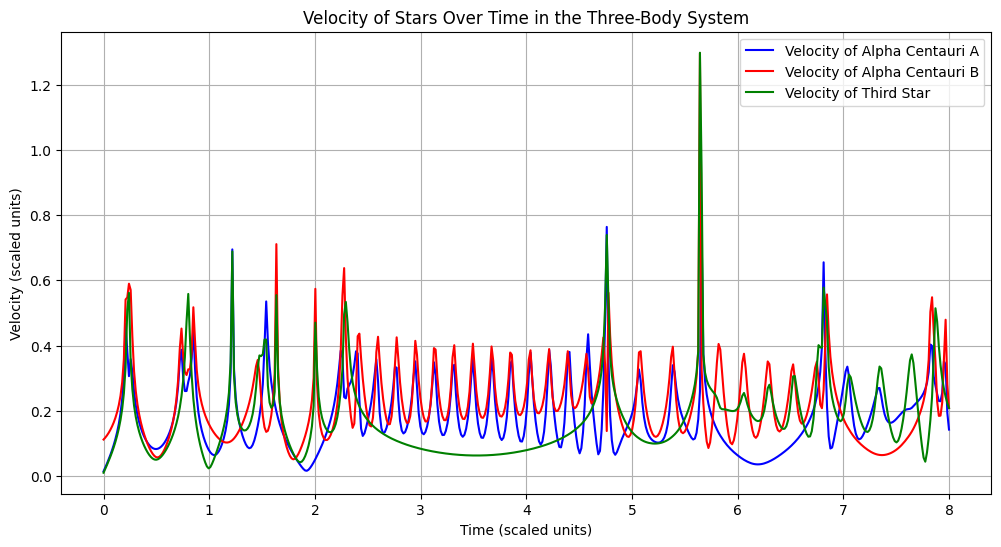

In [ ]:
# Extracting velocities from the solution
v1_sol = three_body_sol[:, 9:12]
v2_sol = three_body_sol[:, 12:15]
v3_sol = three_body_sol[:, 15:18]

# Calculate the magnitudes of the velocities
speed1 = np.linalg.norm(v1_sol, axis=1)
speed2 = np.linalg.norm(v2_sol, axis=1)
speed3 = np.linalg.norm(v3_sol, axis=1)

# Plotting velocities over time
plt.figure(figsize=(12, 6))
plt.plot(time_span, speed1, label="Velocity of Alpha Centauri A", color='blue')
plt.plot(time_span, speed2, label="Velocity of Alpha Centauri B", color='red')
plt.plot(time_span, speed3, label="Velocity of Third Star", color='green')
plt.xlabel("Time (scaled units)")
plt.ylabel("Velocity (scaled units)")
plt.title("Velocity of Stars Over Time in the Three-Body System")
plt.legend()
plt.grid(True)
plt.show()


# ACCELERATION:

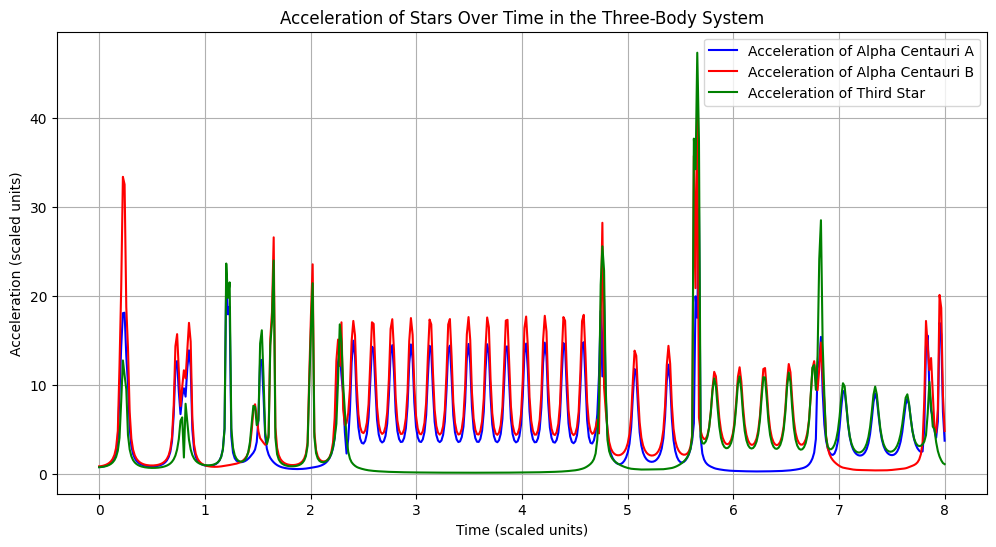

In [ ]:
# Calculating acceleration by taking the derivative of velocity
acceleration1 = np.gradient(v1_sol, time_span, axis=0)
acceleration2 = np.gradient(v2_sol, time_span, axis=0)
acceleration3 = np.gradient(v3_sol, time_span, axis=0)

# Calculate magnitudes of accelerations
acceleration1_magnitude = np.linalg.norm(acceleration1, axis=1)
acceleration2_magnitude = np.linalg.norm(acceleration2, axis=1)
acceleration3_magnitude = np.linalg.norm(acceleration3, axis=1)

# Plotting the acceleration graph
plt.figure(figsize=(12, 6))
plt.plot(time_span, acceleration1_magnitude, label="Acceleration of Alpha Centauri A", color='blue')
plt.plot(time_span, acceleration2_magnitude, label="Acceleration of Alpha Centauri B", color='red')
plt.plot(time_span, acceleration3_magnitude, label="Acceleration of Third Star", color='green')
plt.xlabel("Time (scaled units)")
plt.ylabel("Acceleration (scaled units)")
plt.title("Acceleration of Stars Over Time in the Three-Body System")
plt.legend()
plt.grid(True)
plt.show()


# BINARIZATION:

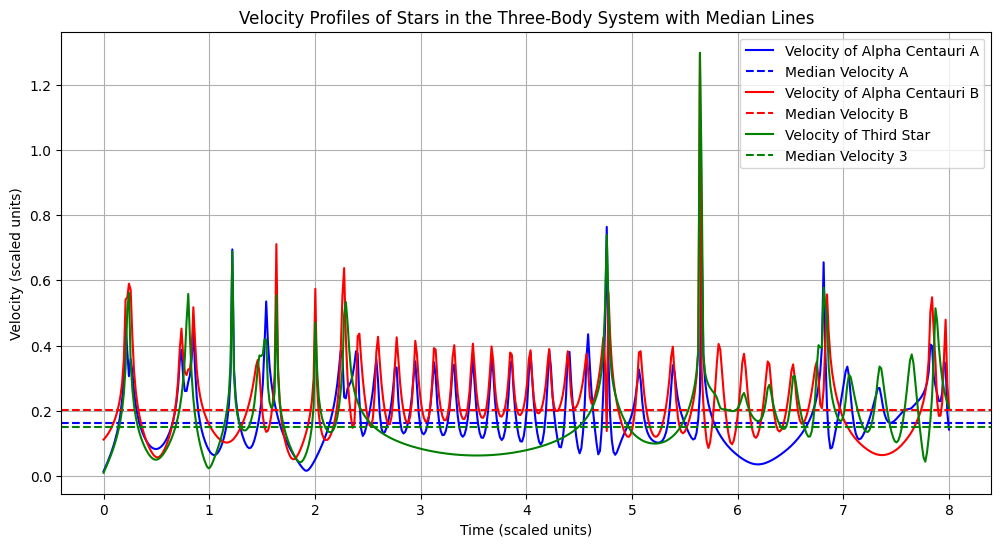

In [ ]:
# Calculating median velocities for each star
median_velocity_A = np.median(speed1)
median_velocity_B = np.median(speed2)
median_velocity_3 = np.median(speed3)

# Plotting velocity profiles with median lines
plt.figure(figsize=(12, 6))

# Plotting velocity of Alpha Centauri A
plt.plot(time_span, speed1, label="Velocity of Alpha Centauri A", color='blue')
plt.axhline(y=median_velocity_A, color='blue', linestyle='--', label="Median Velocity A")

# Plotting velocity of Alpha Centauri B
plt.plot(time_span, speed2, label="Velocity of Alpha Centauri B", color='red')
plt.axhline(y=median_velocity_B, color='red', linestyle='--', label="Median Velocity B")

# Plotting velocity of the Third Star
plt.plot(time_span, speed3, label="Velocity of Third Star", color='green')
plt.axhline(y=median_velocity_3, color='green', linestyle='--', label="Median Velocity 3")

plt.title("Velocity Profiles of Stars in the Three-Body System with Median Lines")
plt.xlabel("Time (scaled units)")
plt.ylabel("Velocity (scaled units)")
plt.legend()
plt.grid(True)
plt.show()



# STAIRCASE

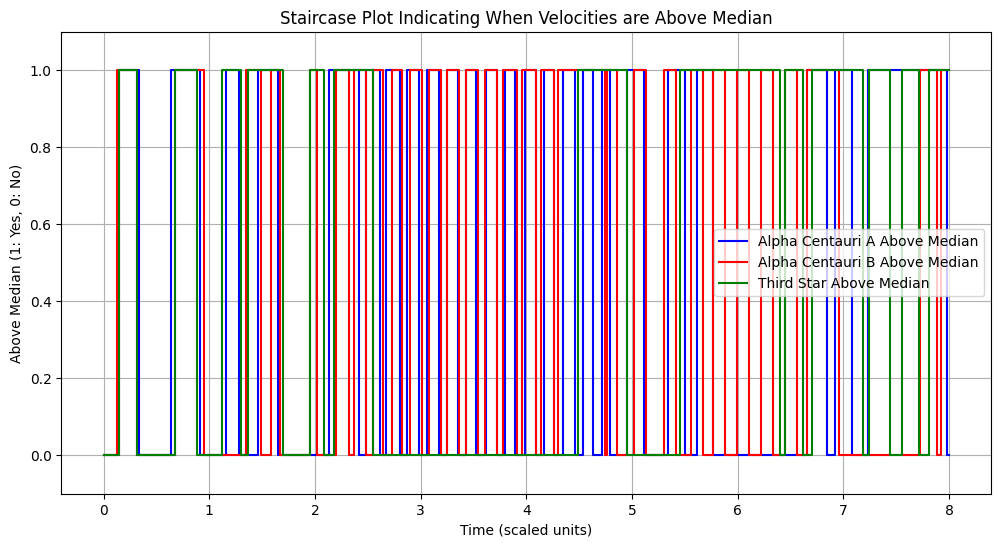

In [ ]:
# Creating a staircase plot to indicate when velocities are above or below the median for each star
above_median_A = np.where(speed1 > median_velocity_A, 1, 0)
above_median_B = np.where(speed2 > median_velocity_B, 1, 0)
above_median_3 = np.where(speed3 > median_velocity_3, 1, 0)

# Plotting
plt.figure(figsize=(12, 6))

# Staircase plot for Alpha Centauri A
plt.step(time_span, above_median_A, label="Alpha Centauri A Above Median", color='blue')

# Staircase plot for Alpha Centauri B
plt.step(time_span, above_median_B, label="Alpha Centauri B Above Median", color='red')

# Staircase plot for the Third Star
plt.step(time_span, above_median_3, label="Third Star Above Median", color='green')

plt.title("Staircase Plot Indicating When Velocities are Above Median")
plt.xlabel("Time (scaled units)")
plt.ylabel("Above Median (1: Yes, 0: No)")
plt.ylim(-0.1, 1.1)  # Set y limits to clearly show 0 and 1
plt.legend()
plt.grid(True)
plt.show()


# STATE HISTOGRAM

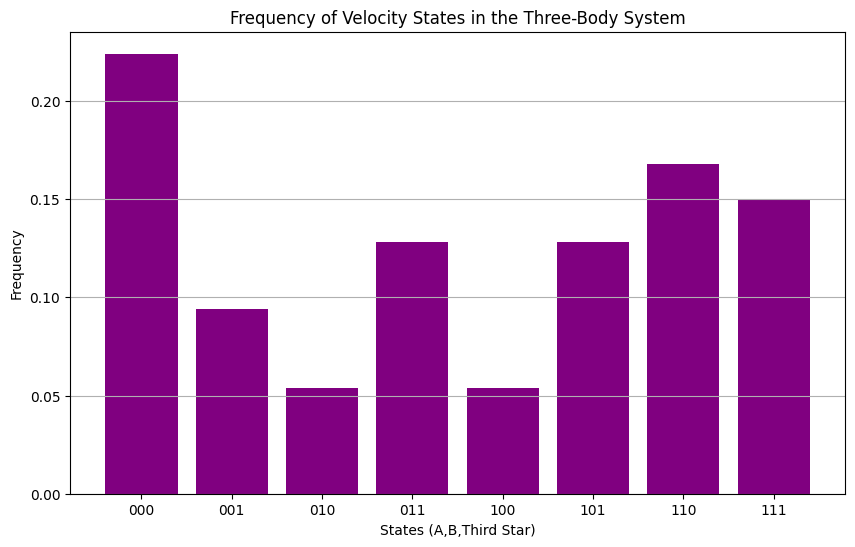

In [ ]:
# Combining the states of all three stars to determine the possible system states
combined_states = above_median_A * 4 + above_median_B * 2 + above_median_3

# Counting the occurrences of each state
state_counts = np.bincount(combined_states, minlength=8)

# Calculating the frequency of each state
state_frequencies = state_counts / len(combined_states)

# State labels (from '000' to '111')
state_labels = [format(i, '03b') for i in range(8)]

# Plotting histogram of state frequencies
plt.figure(figsize=(10, 6))
plt.bar(state_labels, state_frequencies, color='purple')
plt.title("Frequency of Velocity States in the Three-Body System")
plt.xlabel("States (A,B,Third Star)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


# TPM

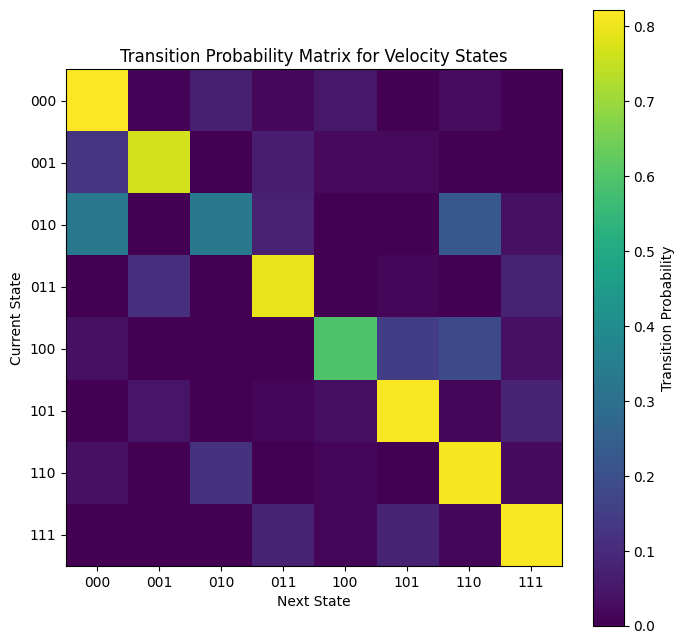

In [ ]:
# Function to calculate transition probabilities between states for the three-body system
def calculate_transition_probabilities(states, num_states):
    # Initialize transition matrix
    transition_matrix = np.zeros((num_states, num_states))

    # Count transitions
    for (current, next_) in zip(states[:-1], states[1:]):
        transition_matrix[current, next_] += 1

    # Normalize each row to get probabilities
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    normalized_transition_matrix = transition_matrix / row_sums

    return normalized_transition_matrix

# Number of unique states for the three-body system (2^3 = 8)
num_states = 8

# Calculate the transition probabilities
transition_probabilities = calculate_transition_probabilities(combined_states, num_states)

# Plotting the transition matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(transition_probabilities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.xticks(range(num_states), state_labels)
plt.yticks(range(num_states), state_labels)
plt.title('Transition Probability Matrix for Velocity States')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()
